In [ ]:
# plotting code inspired by: http://iguananaut.net/blog/programming/git-logs-in-pandas.html

In [99]:
import os
import pickle
import email

import numpy as np
import pandas as pd
from matplotlib import pylab as plt
from matplotlib.ticker import FuncFormatter

import seaborn as sns
from scipy.interpolate import UnivariateSpline

In [2]:
%matplotlib inline

In [3]:
from IPython.core.debugger import Tracer

In [4]:
storage_path = '/home/zormit/bigdata/innovation-thesis/'
projects_data_filename = '/home/zormit/ownCloud/Uni/msemester5/innovation-thesis/data/projects.csv'

In [5]:
def load_headers(storage_path, projects_data_filename):
    projects_data = pd.read_csv(projects_data_filename, skipfooter=1, engine='python')
    headers = dict()
    for row_id, project_data in projects_data.iterrows():
        project_headers_filename = os.path.join(
            storage_path,
            'header',
            project_data.list_id+'.pkl')
        with open(project_headers_filename, 'rb') as project_headers:
            headers[project_data.list_id] = pickle.load(project_headers)
    return headers

In [6]:
headers = load_headers(storage_path, projects_data_filename)

In [7]:
headers.keys()

dict_keys(['gmane.comp.desktop.xfce.devel.version4', 'gmane.comp.emulators.freedos.devel', 'gmane.comp.bug-tracking.bugzilla.devel', 'gmane.comp.emulators.bochs.devel', 'gmane.comp.emulators.kvm.devel', 'gmane.comp.bug-tracking.flyspray.devel', 'gmane.comp.desktop.rox.devel', 'gmane.comp.boot-loaders.grub.devel', 'gmane.comp.db.monetdb.devel', 'gmane.comp.bug-tracking.request-tracker.devel', 'gmane.comp.cad.geda.devel', 'gmane.comp.boot-loaders.u-boot', 'gmane.comp.db.axion.devel'])

In [34]:
start_date = '2007-1-1'
end_date = '2015-12-31'
per_day = pd.date_range(start_date, end_date, freq='D')
emails_per_day = pd.DataFrame(np.zeros((len(per_day), len(headers)), dtype=int), index=per_day , columns=headers.keys())

for project, p_headers in headers.items():
    print(project)
    # emails_per_day = pd.Series(np.zeros(len(per_day), dtype=int), index=per_day)
    for header in p_headers:
        email_datetime = email.utils.parsedate_to_datetime(header['Date'])
        try:
            emails_per_day.loc[email_datetime.date(), project] += 1
        except KeyError:
            # ignore dates that are out of range
            pass
    # break # go only over one project, for development purposes

gmane.comp.desktop.xfce.devel.version4
gmane.comp.emulators.freedos.devel
gmane.comp.bug-tracking.bugzilla.devel
gmane.comp.emulators.bochs.devel
gmane.comp.emulators.kvm.devel
gmane.comp.bug-tracking.flyspray.devel
gmane.comp.desktop.rox.devel
gmane.comp.boot-loaders.grub.devel
gmane.comp.db.monetdb.devel
gmane.comp.bug-tracking.request-tracker.devel
gmane.comp.cad.geda.devel
gmane.comp.boot-loaders.u-boot
gmane.comp.db.axion.devel


In [38]:
import pickle
pickle.dump(emails_per_day, open('../data/intermediate_results/emails_per_day.pkl', 'wb'))

In [93]:
emails_per_month = emails_per_day.to_period(freq='M').groupby(level=0).aggregate(sum)

In [94]:
emails_per_month

,gmane.comp.desktop.xfce.devel.version4,gmane.comp.emulators.freedos.devel,gmane.comp.bug-tracking.bugzilla.devel,gmane.comp.emulators.bochs.devel,gmane.comp.emulators.kvm.devel,gmane.comp.bug-tracking.flyspray.devel,gmane.comp.desktop.rox.devel,gmane.comp.boot-loaders.grub.devel,gmane.comp.db.monetdb.devel,gmane.comp.bug-tracking.request-tracker.devel,gmane.comp.cad.geda.devel,gmane.comp.boot-loaders.u-boot,gmane.comp.db.axion.devel
2007-01,455,16,114,25,485,300,51,52,87,32,97,472,92
2007-02,153,20,63,14,437,305,65,46,78,63,136,524,132
2007-03,211,66,58,25,404,194,32,108,30,45,371,779,88
2007-04,183,70,41,14,711,150,51,58,97,32,363,672,66
2007-05,144,48,187,16,831,312,58,214,63,81,355,799,60
2007-06,79,35,39,17,796,273,59,255,57,93,307,665,84
2007-07,134,26,21,4,1008,186,72,150,69,50,225,811,122
2007-08,105,43,82,17,1119,96,31,90,48,30,129,1004,122
2007-09,155,33,54,34,1096,96,35,46,85,18,146,682,62
2007-10,91,86,75,17,1447,29,46,172,162,32,180,821,23


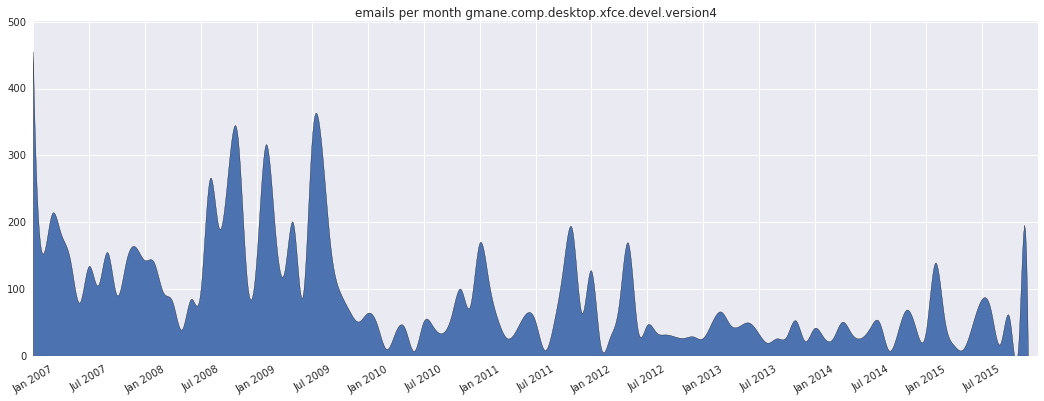

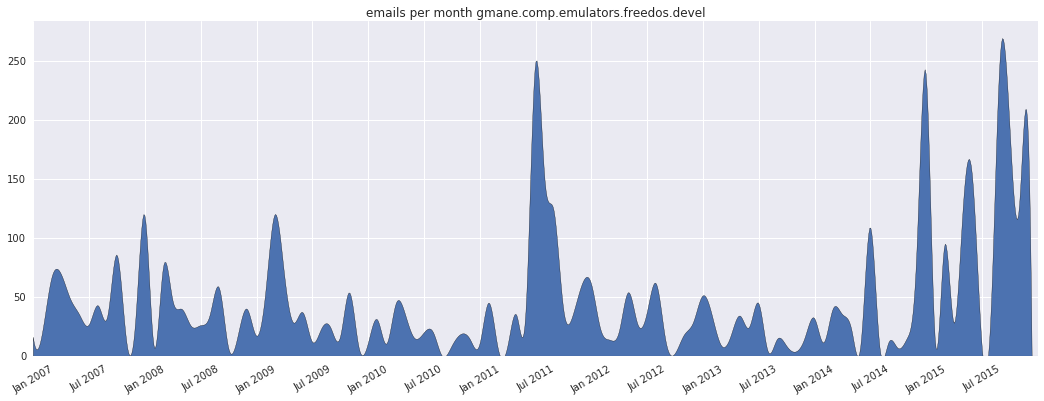

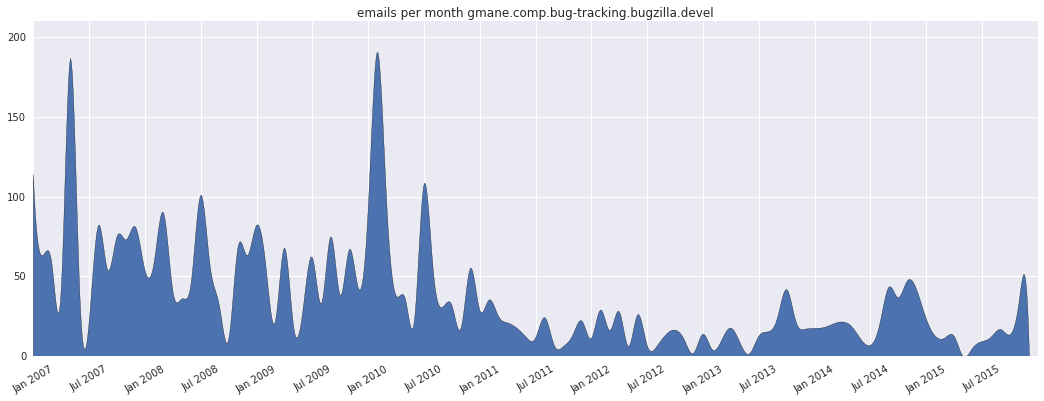

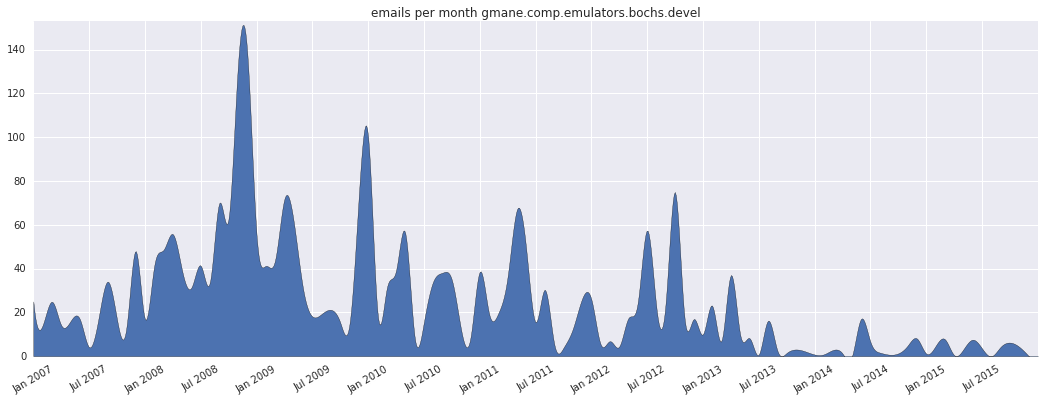

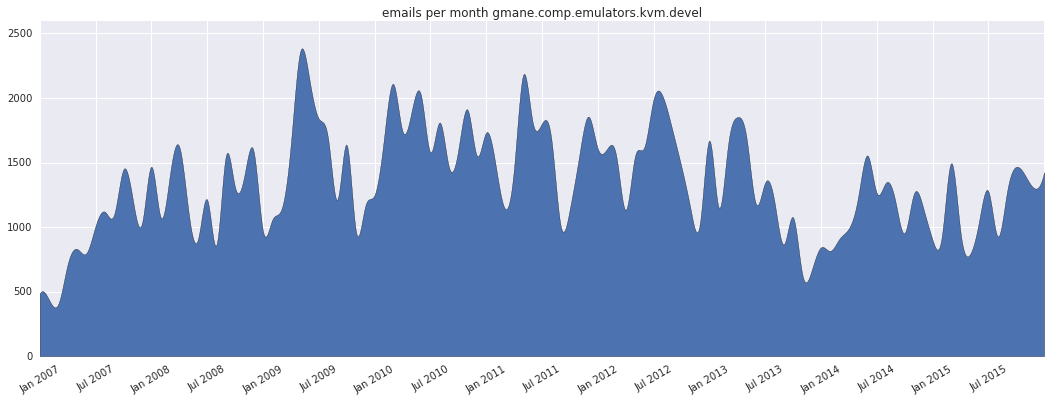

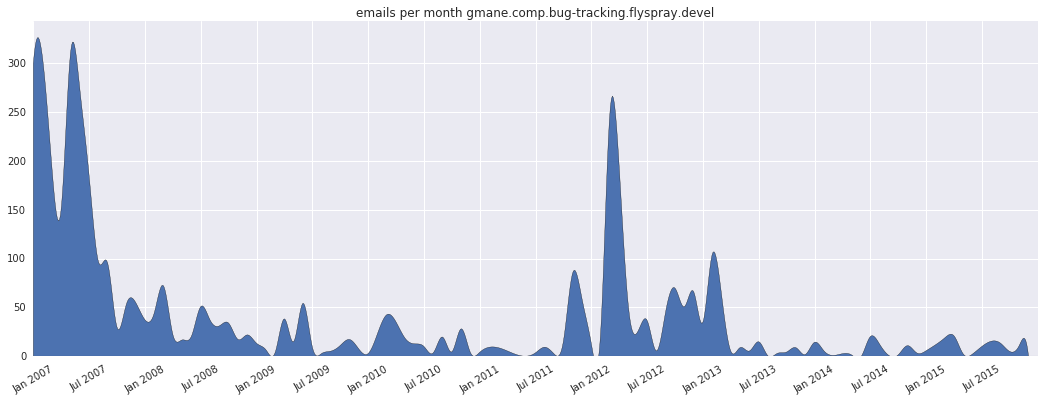

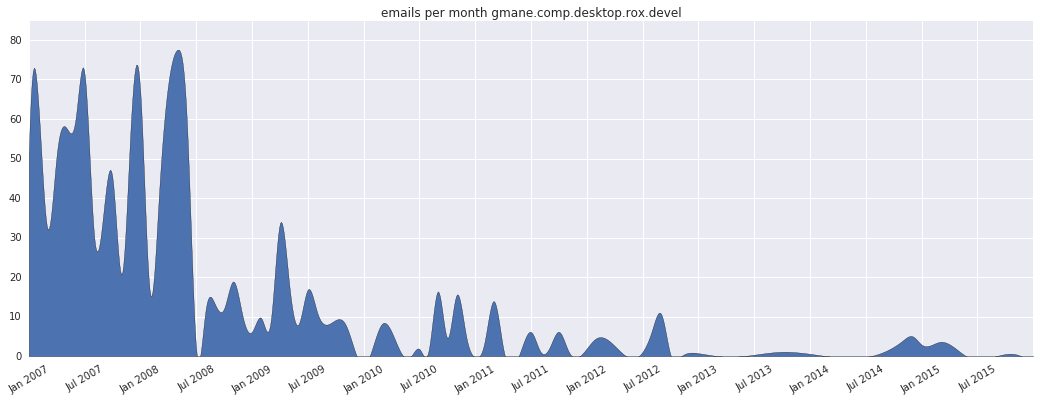

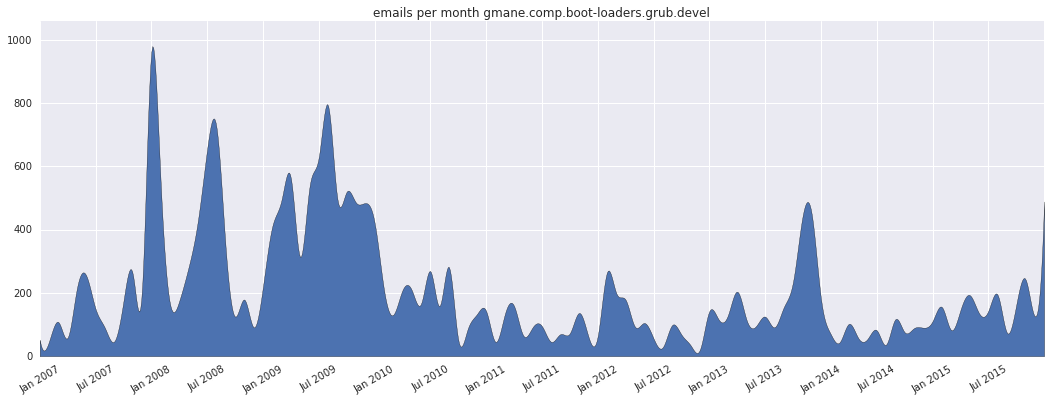

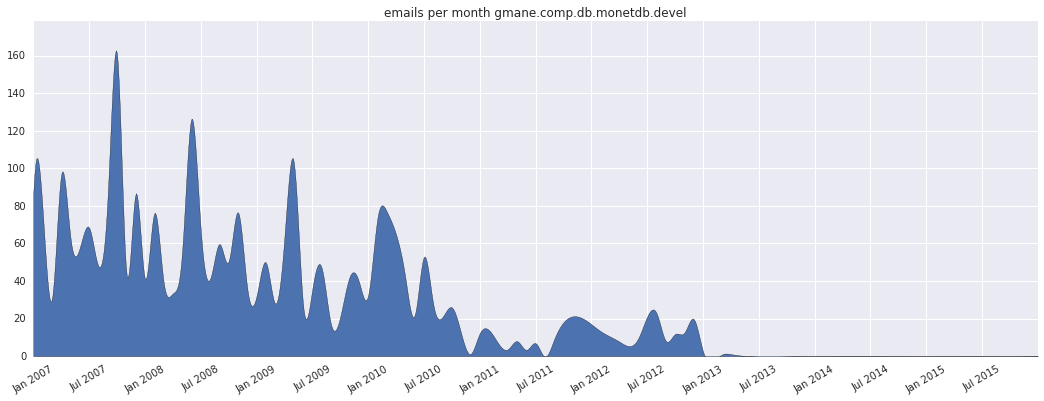

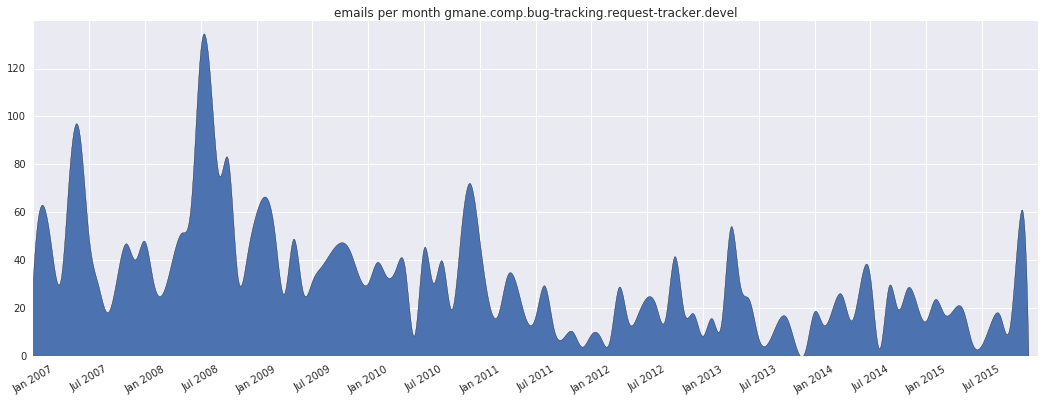

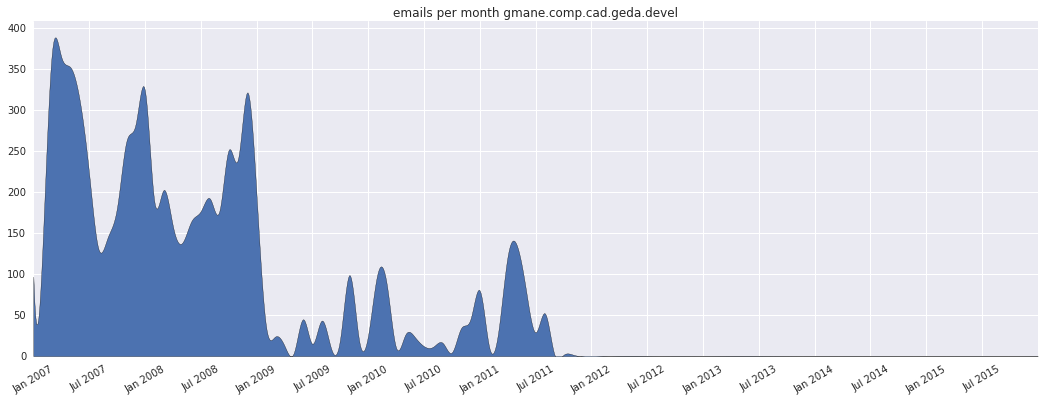

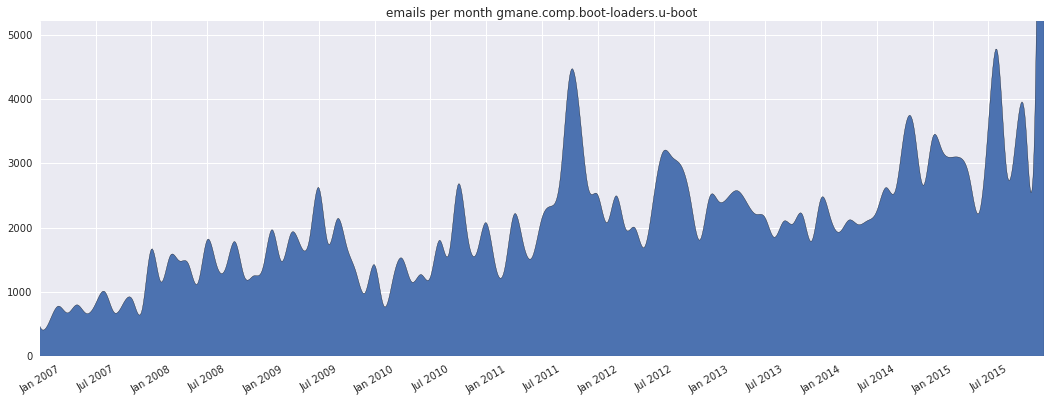

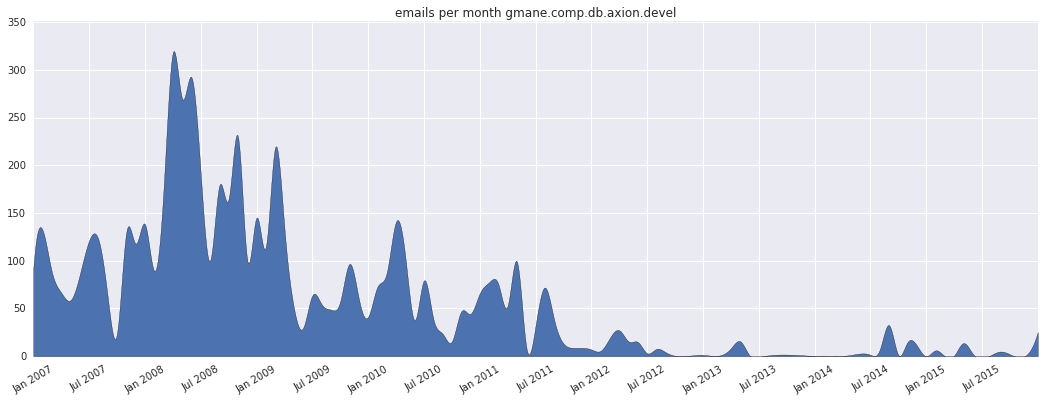

In [104]:
for project in emails_per_day.columns:
    mails = emails_per_month.loc[:, project]
    
    fn = UnivariateSpline(range(len(mails)), mails)
    fig, ax = plt.subplots(1)
    fig.set_size_inches((18, 6))
    x = np.linspace(0, len(mails), 1000)
    plt.fill_between(x, 0, fn(x))
    ax.set_title('emails per month {}'.format(project))
    ax.set_xlim(0, len(mails))
    ax.set_ylim(0, max(mails) + 0.1 * max(mails))
    ax.xaxis.set_ticks(np.linspace(0, len(mails) - 1, 8)[1:-1])
    
    def formatter(x, p):
        if x >= len(mails.index):
            return ''
        return mails.index[int(x)].strftime('%b %Y')

    formatter = FuncFormatter(formatter)
    ax.xaxis.set_major_formatter(formatter)
    ax.xaxis.tick_bottom()
    ax.yaxis.tick_left()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    plt.setp(plt.xticks()[1], rotation=30)
    
    import matplotlib.ticker as plticker

    loc = plticker.MultipleLocator(base=6) # this locator puts ticks at regular intervals
    ax.xaxis.set_major_locator(loc)

    # break # go only over one project, for development purposes

(0, 38)

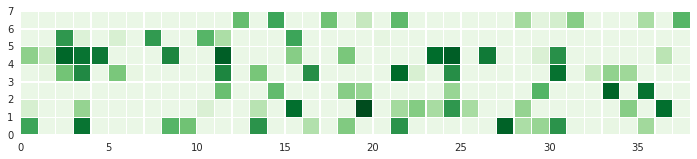

In [106]:
# Another idea: use github-like activity plot. example:
# prepare some random data
N = 100
np.random.seed(0)
weekday = np.random.randint(0, 7, N)
week = np.random.randint(0, 40, N)
activity = np.random.randint(0, 100, N)

df = pd.DataFrame({"weekday":weekday, "week":week, "activity":activity})
df.drop_duplicates(subset=["weekday", "week"], inplace=True)

# reshape the data and plot it
df2 = df.pivot(columns="week", index="weekday", values="activity")
df2.fillna(0, inplace=True)

Weekday, Week = np.mgrid[:df2.shape[0]+1, :df2.shape[1]+1]
fig, ax = plt.subplots(figsize=(12, 4))
ax.set_aspect("equal")
plt.pcolormesh(Week, Weekday, df2.values, cmap="Greens", edgecolor="w", vmin=-10, vmax=100)
plt.xlim(0, df2.shape[1])